In [1]:
# CHECKPOINT = 'wave-u-net-fl-up-learning-rate-1575794210.full.ckpt'
CHECKPOINT = 'wave-u-net-wavenet-mse-multikernel-1576572189.full.ckpt'
# CHECKPOINT = 'wave-u-net-mse-try-replicate-success-2-1575377123.full.ckpt'
CHECKPOINT = 'wave-u-net-multi-dilated-encoder-1576585555.full.ckpt'

In [2]:
branch_suffix = '-'.join(CHECKPOINT.replace('wave-u-net-', '').split('-')[0:-1])
branch = f'train/{branch_suffix}'
print(branch)

train/multi-dilated-encoder


In [3]:
%%bash -s $branch
cd ../../speech-enhancement
git checkout $1

Your branch is up to date with 'origin/train/multi-dilated-encoder'.


Switched to branch 'train/multi-dilated-encoder'


In [4]:
from src.datasets import NoisySpeechDataset
from src.utils import checkpoint
from src.utils.notebook import Sampler, visualize_audio 

In [5]:
dataset = NoisySpeechDataset(train=False, quiet=True)

In [6]:
net = checkpoint.load(CHECKPOINT, use_cuda=False)
net = net.eval()
sampler = Sampler(net, dataset)

In [19]:
# URL = 'http://hwcdn.libsyn.com/p/6/2/4/624d98a205e61696/Episode6.mp3?c_id=16277365&cs_id=16277365&expiration=1573280793&hwt=d38322eec81b7584389a6b9b6a92159a'
# START = 17 * 2**16
# WIDTH = 2 * 2**16
# noisy_arr, pred_clean, pred_noise = sampler.get_results_from_mp3_url(URL, start=START, width=WIDTH)

IDX = 102
noisy_arr, clean_arr, pred_clean, pred_noise, true_noise = sampler.get_results(IDX)

Predicted clean signal


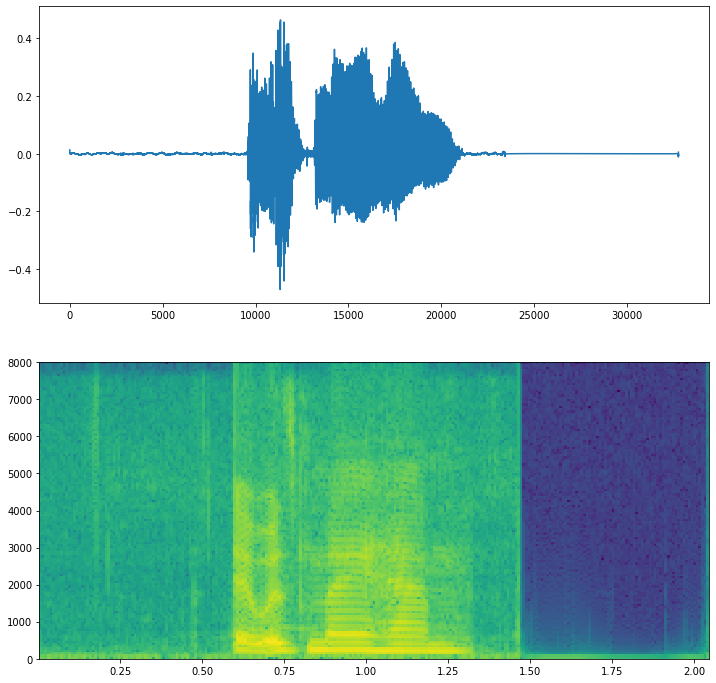

In [20]:
visualize_audio(pred_clean, 'Predicted clean signal')

Clean signal


/home/matt/code/speech/notebooks/env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:7747: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


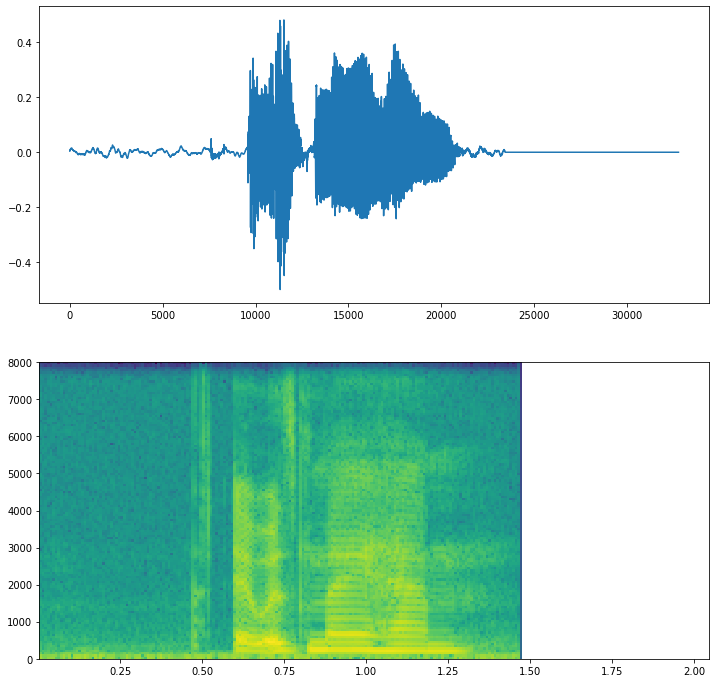

In [21]:
visualize_audio(clean_arr, 'Clean signal')

Noisy signal


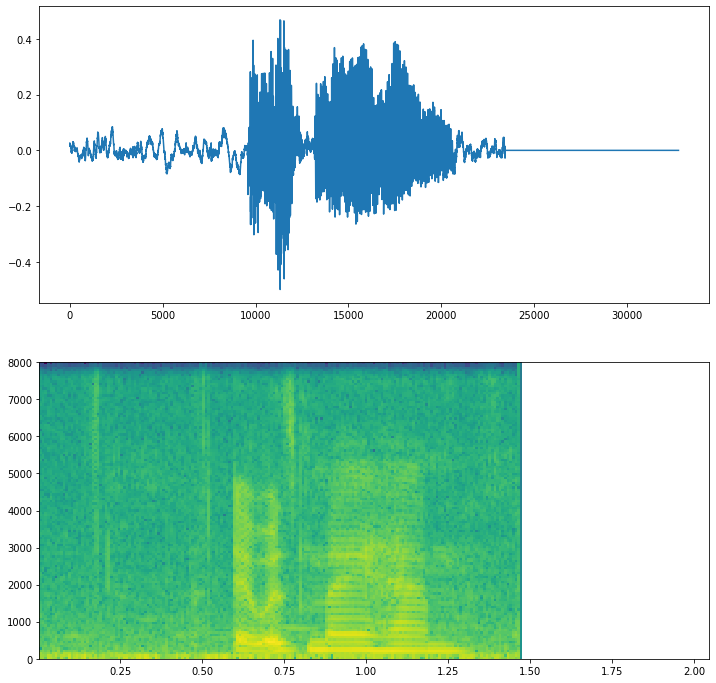

In [22]:
visualize_audio(noisy_arr, 'Noisy signal')

Predicted noise


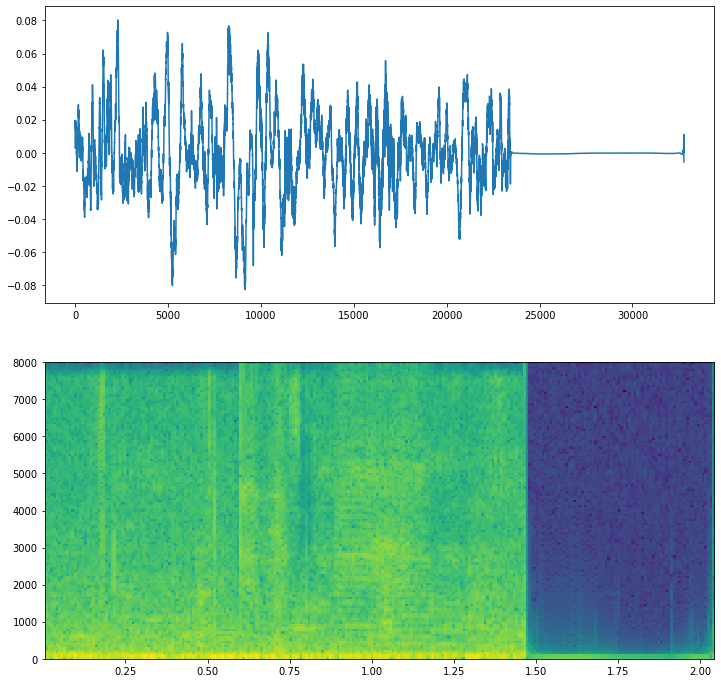

In [23]:
visualize_audio(pred_noise, 'Predicted noise')

True noise signal


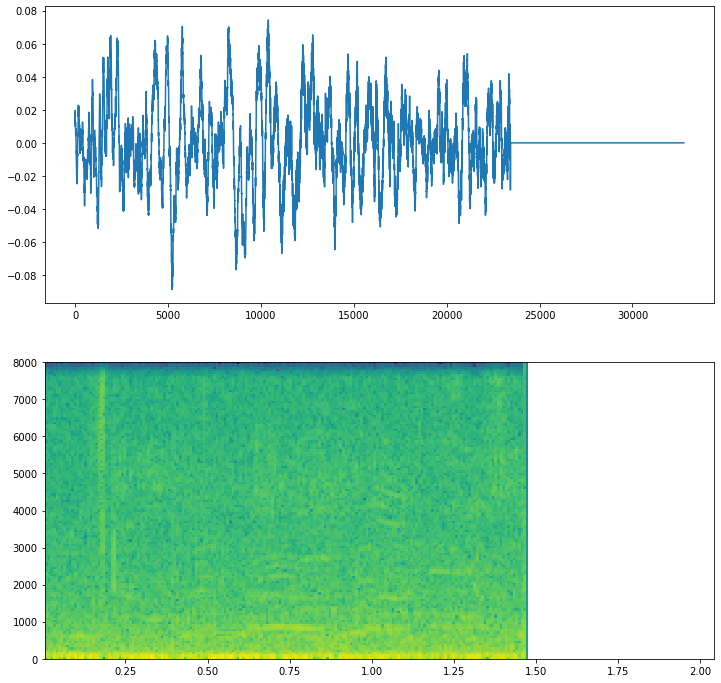

In [24]:
visualize_audio(true_noise, 'True noise signal')